In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Columns Names
book_cols = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
rating_cols = ['userId','ISBN','bookRating']
user_cols = ['userId','location','age']

#importing datasets
books=pd.read_csv("C:/Users/USER/Desktop/Live Project 3/Dataset/Books.csv")
users=pd.read_csv("C:/Users/USER/Desktop/Live Project 3/Dataset/Users.csv")
ratings=pd.read_csv("C:/Users/USER/Desktop/Live Project 3/Dataset/Ratings.csv")

## Books Dataset

In [4]:
books.head(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [5]:
print(books.shape)

(271360, 8)


In [6]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
books.duplicated().sum()

0

In [8]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


### Correcting misprinted values 'DK Publishing Inc' & 'Gallimard'

In [9]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [10]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


#### Publisher names have been incorrectly loaded as the Year-Of-Publication.
#### Year-Of-Publication has been incorrectly loaded as the Book Author. 

In [11]:
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [12]:
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [13]:
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [14]:
books.loc[(books.ISBN == '2070426769') | (books.ISBN == '078946697X') | (books.ISBN == '0789466953'),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [15]:
#Replacing non numeric values with NaN.
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


#### All values have now been corrected and are in integer format.
#### Value 0 for year of publication is incorrect. 
#### As this dataset was published in 2004. Assuming that the years after 2006 to be invalid keeping some margin in case dataset was updated thereafer setting invalid years as NaN.

In [16]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#### Using Series.fillna() to fill the NAN values with mean value of the years.

In [17]:
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)

In [18]:
#STORING LAST 3 COLUMNS TO ANOTHER DATA FRAME.
books_data = books[['ISBN', 'Book-Title','Image-URL-S', 'Image-URL-M', 'Image-URL-L']]
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [19]:
books_data.head()

,ISBN,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [20]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [21]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [22]:
#Correcting 2 NaN values from Publisher Column.
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [23]:
books.loc[books['Publisher'] == 'Other Press',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
54664,1590510399,A Cleaning Woman,Christian Oster,2003.0,Other Press
60948,1590510917,Monsieur Ibrahim and the Flowers of the Koran/...,Eric-Emmanuel Schmidt,2004.0,Other Press
74306,1892746816,The Artificial Silk Girl,Irmgard Keun,2002.0,Other Press


In [24]:
books.Publisher.fillna('Other Press',inplace=True)

In [25]:
books.loc[books['Publisher'] == 'Other Press',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
54664,1590510399,A Cleaning Woman,Christian Oster,2003.0,Other Press
60948,1590510917,Monsieur Ibrahim and the Flowers of the Koran/...,Eric-Emmanuel Schmidt,2004.0,Other Press
74306,1892746816,The Artificial Silk Girl,Irmgard Keun,2002.0,Other Press
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,Other Press
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,Other Press


In [26]:
#Correcting 1 NaN value from Book Author column
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [27]:
books['Book-Author'].fillna('Larissa Anne Downes',inplace=True)
books.loc[books.ISBN == '9627982032',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,Larissa Anne Downes,1995.0,Edinburgh Financial Publishing


## Top 5 Book Authors

In [28]:
books['Book-Author'].value_counts().nlargest(5)

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Name: Book-Author, dtype: int64

Text(0.5, 1.0, 'Top 5 Authors')

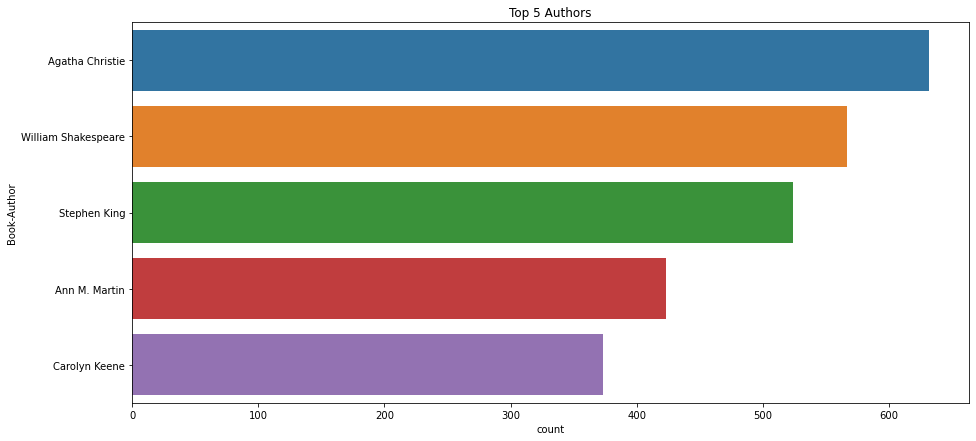

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:5].index)
plt.title('Top 5 Authors')

## Top 5 Publishers

In [30]:
books['Publisher'].value_counts().nlargest(5)

Harlequin           7535
Silhouette          4220
Pocket              3905
Ballantine Books    3783
Bantam Books        3646
Name: Publisher, dtype: int64

Text(0.5, 1.0, 'Top 5 Publishers')

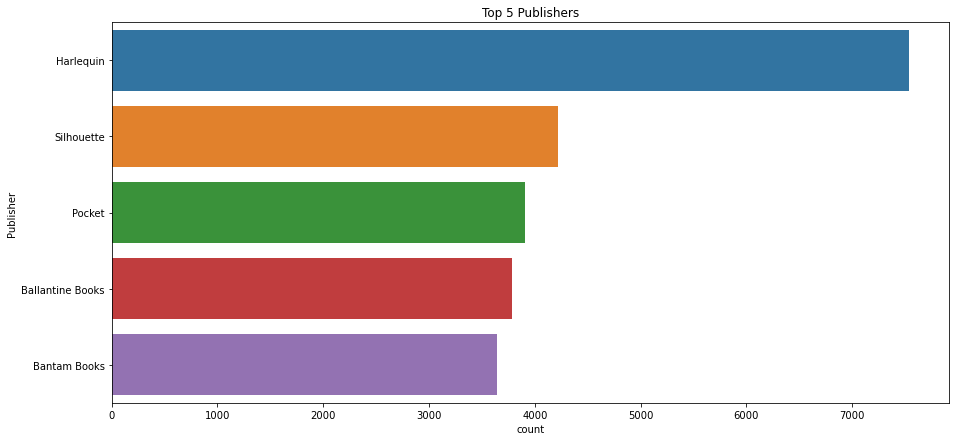

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:5].index)
plt.title('Top 5 Publishers')

## User Dataset

In [32]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [33]:
print(users.shape)

(278858, 3)


In [34]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [35]:
users.duplicated().sum()

0

#### Replacing Age values below 4 and above 90 by NaN values.

In [36]:
users.loc[(users.Age > 90) | (users.Age < 4), 'Age'] = np.nan

#### Replacing NANs with mean value of users and converting data type to int

In [37]:
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int64)

In [38]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

## Ratings Dataset

In [39]:
print(ratings.shape)

(1149780, 3)


In [40]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [41]:
ratings.duplicated().sum()

0

### Merging Books and Ratings data using pd.merge()

In [42]:
merged_data = pd.merge(books, ratings, on='ISBN')
merged_data =  merged_data.sort_values('ISBN', ascending=True)
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster,171118,8
968138,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins,86123,0
968139,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins,209516,0
542150,0001046438,Liar,Stephen Fry,1994.0,Harpercollins Uk,23902,9
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers,196149,0


In [43]:
merged_data.groupby('Book-Title')['Book-Rating'].mean().head()

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    2.25
 Always Have Popsicles                                                                                        0.00
 Apple Magic (The Collector's series)                                                                         0.00
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         8.00
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   0.00
Name: Book-Rating, dtype: float64

In [44]:
merged_data.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(5)

Book-Title
Film Is: The International Free Cinema                                                                                                    10.0
More Secrets of Happy Children: Embrace Your Power as a Parent--and Help Your Children be Confident, Positive, Well-Adjusted and Happy    10.0
Jo's Boys : From the Original Publisher                                                                                                   10.0
The Vanished Priestess : An Annie Szabo Mystery                                                                                           10.0
Game and Hunting                                                                                                                          10.0
Name: Book-Rating, dtype: float64

In [45]:
merged_data.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).tail(5)

Book-Title
Invaders of the Planet Earth (Choose Your Own Adventure, No 70)    0.0
Sammy Discovers the Alphabet (Learn-With-Sammy)                    0.0
Sammy Carducci's Guide to Women                                    0.0
Sammle mir Kiesel am FluÃ?Â?. Mehr als eine Liebesgeschichte.      0.0
TRAVELLING MAN                                                     0.0
Name: Book-Rating, dtype: float64

In [46]:
merged_data.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(5)

Book-Title
Wild Animus                   2502
The Lovely Bones: A Novel     1295
The Da Vinci Code              898
A Painted House                838
The Nanny Diaries: A Novel     828
Name: Book-Rating, dtype: int64

In [47]:
merged_data.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).tail(5)

Book-Title
Real Love: The Truth About Finding Unconditional Love and Fulfilling Relationships    1
Real Love: The Drawings for Sean                                                      1
Real Love or Fake (Camfield Novel of Love, No 78)                                     1
Fabulous Food for Family and Friends: Healthy Menus for Entertaining With Style       1
Suburban backlash: The battle for the world's most liveable city                      1
Name: Book-Rating, dtype: int64

#### For better visualization of the above outputs, creating a new data frame.

In [48]:
ratings_new = pd.DataFrame(merged_data.groupby('Book-Title')['Book-Rating'].mean())

In [49]:
ratings_new['rating_counts'] = pd.DataFrame(merged_data.groupby('Book-Title')['Book-Rating'].count())

In [50]:
ratings_new.head(10)

,Book-Rating,rating_counts
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25,4
Always Have Popsicles,0.00,1
Apple Magic (The Collector's series),0.00,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00,1
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.00,1
Dark Justice,10.00,1
Deceived,0.00,2
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",5.00,10


# DATA EXPLORATION

### Visualising Top 30 Most Read Books with their Ratings

#### Using DataFrame.groupby() and DataFrame.sort_values() for ploting a barplot

In [51]:
merged_data.rename(columns = {'Book-Title':'bookTitle'}, inplace = True)

<AxesSubplot:title={'center':'Average Ratings of Most Read books'}, xlabel='Book-Rating', ylabel='bookTitle'>

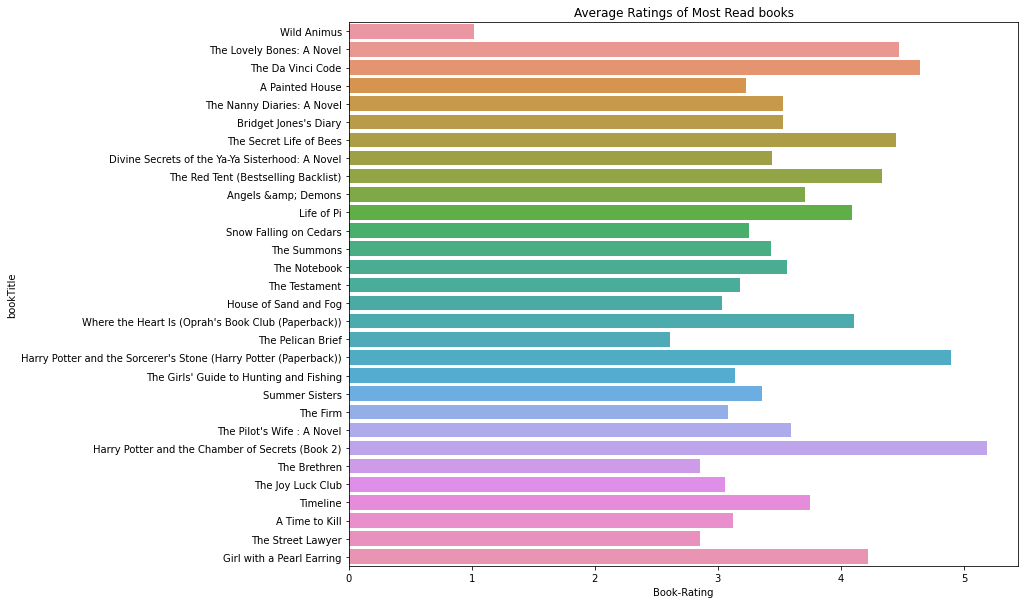

In [52]:
avg_data = merged_data.groupby('bookTitle', as_index=False)['Book-Rating'].mean()
temp = merged_data.bookTitle.value_counts().reset_index()
temp.columns = ['bookTitle','count']
most_rated_by_reads = pd.merge(avg_data,temp,on='bookTitle')

most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'Book-Rating', y = 'bookTitle', data = most_rated_by_reads.head(30))

### Visualising Top 30 years with Most Books Published

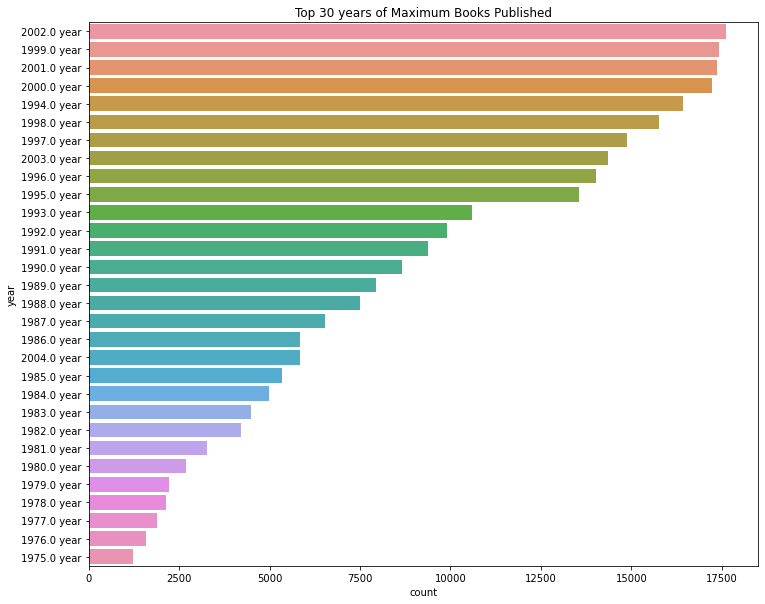

In [53]:
year_viz = books['Year-Of-Publication'].value_counts().reset_index()

year_viz.columns = ['value', 'count']

year_viz['year'] = year_viz['value'].astype(str) + ' year'

year_viz = year_viz.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 years of Maximum Books Published')
sns.barplot(data = year_viz.head(30), x='count', y="year");

## Visualising the Age Distribution of the Users

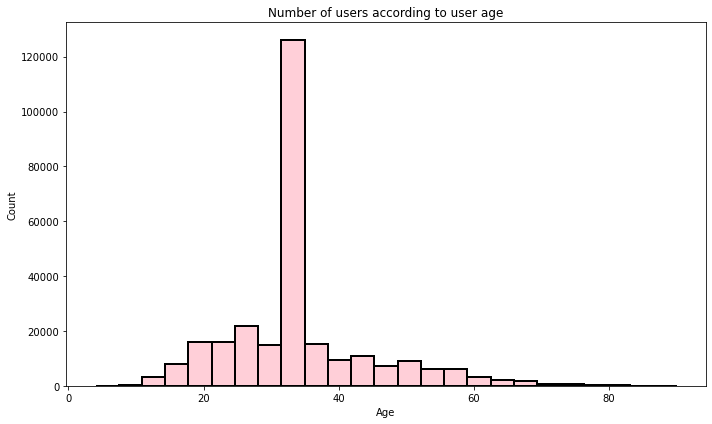

In [54]:
user_age = users.Age
plt.figure(figsize=(10,6), tight_layout=True)
plt.title('Number of users according to user age')
sns.histplot(user_age, bins=25, linewidth = 2, color = 'pink', edgecolor = 'black');

### We can observe that most of the readers are 32 - 36 years.

## Visualizing the Relation between Rating Counts & Average Rating

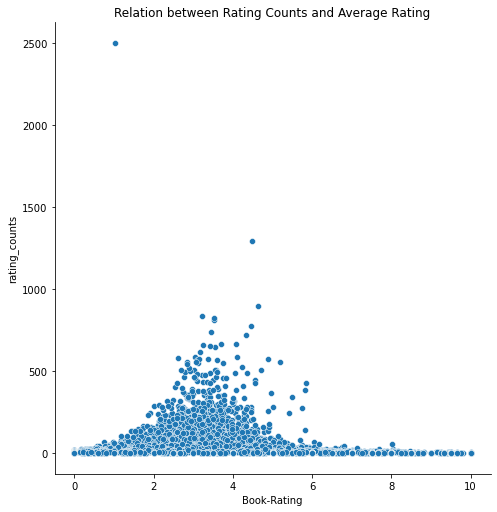

In [55]:
rel=sns.relplot(data=ratings_new, x="Book-Rating", y="rating_counts",sizes=(400,200), height=7)
plt.title('Relation between Rating Counts and Average Rating')
rel.set_axis_labels("Book-Rating","rating_counts")

### Checking Ratings Distribution

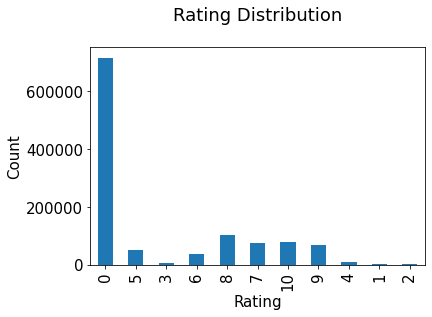

In [56]:
plt.rc("font", size=15)
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Ratings are extremely unevenly distributed.
Above 600000 ratings are implicit. 

## Segragating implicit and explict ratings.

In [57]:
ratings.sample(5)

,User-ID,ISBN,Book-Rating
630255,153152,0306812274,8
649876,157247,0752853503,2
279883,66443,1893896161,0
1016304,243553,0385472943,5
415989,98787,0449213773,0


Ratings data must only have books existing in our book dataset. ISBN's that are not a part of the books data set must be dropped off.

In [58]:
rating_df_new = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [59]:
print('Shape of ratings: {} and rating_df_new: {}'.format(ratings.shape, rating_df_new.shape))

Shape of ratings: (1149780, 3) and rating_df_new: (1031136, 3)


In [60]:
rating_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,647294
1,8,91804
2,10,71225
3,7,66402
4,9,60778
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

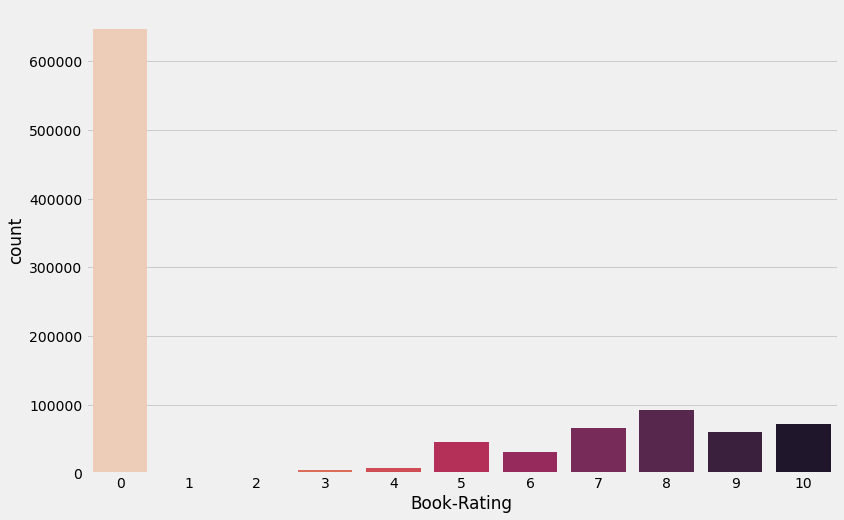

In [61]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=rating_df_new, x='Book-Rating', palette='rocket_r')

We can see for explicit ratings that rating 8 is received by most number of books followed by rating 10. There are 647294 implicitely rated books.

In [62]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383842, 3) and implicit rating: (647294, 3)


### Let's find the most purchased books including the implicitely rated books.

In [63]:
rating_df_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [64]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
118,0671027360,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star
305,044023722X,A Painted House,John Grisham,2001.0,Dell Publishing Company
356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books
748,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial
1922,067976402X,Snow Falling on Cedars,David Guterson,1995.0,Vintage Books USA


### Let's find the most popular explicitely rated books

In [65]:
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21945,0316666343,707
117745,0971880107,581
38819,0385504209,487
18058,0312195516,383
4131,0060928336,320
68898,059035342X,313
12325,0142001740,307
51799,0446672211,295
47986,044023722X,281
57625,0452282152,278


In [66]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
748,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


## Merging All 3 Data Sets

In [67]:
df = pd.merge(books, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')
#shape of the merged dataframe 'df'
df.shape

(383842, 9)

In [68]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,"timmins, ontario, canada",34
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8,5,"timmins, ontario, canada",34
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8,5,"timmins, ontario, canada",34
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8,5,"timmins, ontario, canada",34
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8,6,"timmins, ontario, canada",34


### Extracting 'Country' from the Location Column

In [69]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')
#Displaying the country names
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [70]:
#correcting the mispelled country names
users.loc[users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users.loc[users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users.loc[users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users.loc[users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users.loc[users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users.loc[users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users.loc[users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'])

0              usa
1              usa
2           russia
3         portugal
4               uk
            ...   
278853         usa
278854          uk
278855      canada
278856         usa
278857     ireland
Name: Country, Length: 278858, dtype: object

In [71]:
#Converting the country names to uppercase
users['Country']=users['Country'].str.upper()

In [72]:
#Dropping the column 'Location'
users.drop('Location',axis=1,inplace=True)

In [73]:
users.columns

Index(['User-ID', 'Age', 'Country'], dtype='object')

In [74]:
users.Country.value_counts()

USA         139746
CANADA       21658
UK           18565
GERMANY      17073
SPAIN        13258
             ...  
CARTER           1
MYANMAR          1
RAPIDES          1
ESSEX            1
HERNANDO         1
Name: Country, Length: 483, dtype: int64

In [75]:
df = pd.merge(books, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')
#shape of the merged dataframe 'df'
df.shape

(383842, 9)

In [76]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,34,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8,5,34,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8,5,34,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8,5,34,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8,6,34,CANADA


# Popularity Based Recommender System

It is a type of recommendation system that bases choices on factors like popularity and/or current trends

In [77]:
ratings_with_name = ratings.merge(books,on='ISBN')
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [78]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [79]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [80]:
# function for getting most popular recommendations

def most_popular(df, n):
  if n >= 1 and n <= len(df):
    popular = df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(n)
    return pd.merge(popular, books, on='ISBN')
  return 'Please enter a valid value of n!'

In [81]:
most_popular(df, 10)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,581,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,487,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial
5,059035342X,313,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books
6,0142001740,307,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books
7,0446672211,295,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books
8,044023722X,281,A Painted House,John Grisham,2001.0,Dell Publishing Company
9,0452282152,278,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books


# Country-based book recommendation

In [82]:
# function for getting most popular recommendations country wise

def country_popular(df, country):
  if country in list(df.Country.unique()):
    return most_popular(df[df['Country'] == country], 5) # calling most_popular function to get popular recommendations
  return 'This country is not present in the dataset. Please enter some other country.'

In [83]:
country_popular(df, 'INDIA')

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0971880107,3,Wild Animus,Rich Shapero,2004.0,Too Far
1,0671047612,2,Skin And Bones,Franklin W. Dixon,2000.0,Aladdin
2,0486284735,2,Pride and Prejudice (Dover Thrift Editions),Jane Austen,1995.0,Dover Publications
3,8171670407,2,Inscrutable Americans,Mathur Anurag,1996.0,South Asia Books
4,0006944035,1,Secret Island / Secret Mountain (Two-in-ones),Enid Blyton,1994.0,HarperCollins Publishers


# Weighted average rating method

Using Weighted average for each

Book’s Average Rating

W = (Rv + Cm)/(v + m)

Using Weighted average for each Book’s Average Rating

W = (Rv + Cm)/(v + m)

where

W= Weighted Rating

R = Average of the Books rating

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books

In [84]:
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['Book-Title','Book-Author'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 7.521927888218345 and the minimum number of votes required by the books to be listed is 4  


In [85]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [86]:
df_relevant_data.sort_values(by='weighted_average',ascending=False).head(10)

,Book-Title,Book-Author,avg_rating,ratings_count,weighted_average
46707,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,9.869565,23,9.52
122688,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.653846,52,9.50
30276,Dilbert: A Book of Postcards,Scott Adams,9.923077,13,9.36
82109,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000,11,9.34
118640,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,9.402597,77,9.31
17798,Calvin and Hobbes,Bill Watterson,9.583333,24,9.29
101318,The Authoritative Calvin and Hobbes (Calvin an...,Bill Watterson,9.600000,20,9.25
72923,"My Sister's Keeper : A Novel (Picoult, Jodi)",Jodi Picoult,9.545455,22,9.23
118636,"The Return of the King (The Lord of The Rings,...",J. R. R. Tolkien,9.625000,16,9.20
120617,The Sneetches and Other Stories,Dr. Seuss,10.000000,8,9.17


This is the list of most favored books based on the weighted rating scores. The book 'Harry Potter and the Chamber of Secrets Postcard Book' seems to have top this chart.

# Author based recommender system

In [87]:
def author_based(book_title,number,df_relevant_data=df_relevant_data):
  '''
  To recommend books from the same author as the book entered by the user
  '''
  author=df_relevant_data.loc[df_relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
  author_df=df_relevant_data.loc[(df_relevant_data['Book-Author']==author)].sort_values(by='weighted_average',ascending=False)
  print(f'The author of the book {book_title} is {author}\n')
  print(f'Here are the top {number} books from the same author\n')
  top_rec=author_df.loc[(author_df['Book-Title']!=book_title),['Book-Title','weighted_average']].head(number)
  return(top_rec)

In [88]:
#getting the book name and number of books to recommend
book_title = 'Harry Potter and the Chamber of Secrets (Book 2)'
number =5
author_based(book_title,number)
# top_recommendations from the same author

The author of the book Harry Potter and the Chamber of Secrets (Book 2) is J. K. Rowling

Here are the top 5 books from the same author



,Book-Title,weighted_average
46707,Harry Potter and the Chamber of Secrets Postca...,9.52
46711,Harry Potter and the Goblet of Fire (Book 4),9.10
46730,Harry Potter and the Sorcerer's Stone (Book 1),9.03
46723,Harry Potter and the Prisoner of Azkaban (Book 3),9.02
46715,Harry Potter and the Order of the Phoenix (Boo...,9.02


# Collaborative filtering

Collaborative filtering techniques create a model based on past user activity (items previously purchased, movies viewed and rated, etc.) as well as usage choices made by both current and past users. Then, this model is used to predict the ratings for items or items themselves that the user might be interested in.

## Memory Based Approach

In [89]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
active_users = x[x].index

In [90]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(active_users)]
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


KNN Based Algorithm

This algorithm takes into consideration up-to 'K' nearest users (in user based collaborative filtering) or 'K' nearest items (in item based collaborative filtering) for making recommendations. By default, the algorithm is 'user-based', and k is 40 (kmin is 1). This means ratings of 40 nearest users are considered while recommending an an item to a user. 

In [91]:
# focussing on users with more than 3 ratings and top 10% most frequently rated books

required_ratings = 3

user = df['User-ID'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter_df = df[df['User-ID'].isin(user_list)]

print('Number of users with ratings more than 3 are: {}'.format(filter_df.shape[0]))

Number of users with ratings more than 3 are: 313546


In [92]:
# top 10% most frequently rated books
required = len(filter_df.ISBN.unique()) * 0.1

user_list = filter_df['Book-Title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['Book-Title'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter_df.shape[0]))

Number of top 10% users are: 167493


In [93]:
# shape of final dataset
filter_df.shape

(167493, 9)

In [94]:
# creating a pivot table
table = filter_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Yo!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
".Hack: //Legend of the Twilight, Vol. 1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# filling null values
table.fillna(0, inplace=True)
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Yo!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
".Hack: //Legend of the Twilight, Vol. 1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse = csr_matrix(table)
sparse

<13418x14959 sparse matrix of type '<class 'numpy.float64'>'
	with 166641 stored elements in Compressed Sparse Row format>

In [97]:
#Creating an instance of KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute')

In [98]:
# function to get recommendations

def get_recommendations(name, n):

  # getting book id
  book_id= np.where(table.index==name)[0][0]

  # distances and suggestions based on similarity
  distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  suggestions = suggestions.flatten().tolist()

  for i in range(len(suggestions)):
    # if book is same as input
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[suggestions[i]])
  return

In [99]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Dragons of a Lost Star (The War of Souls, Volume II)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
Lover Beware
J. K. Rowling: The Wizard Behind Harry Potter
Earthfall (Homecoming (Paperback))
A Dash of Death


# KNN with cosine metric

In [100]:
#Creating an instance of KNN with cosine metric

model_cosine = NearestNeighbors(metric='cosine', algorithm='brute')
model_cosine.fit(sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [101]:
# function to get recommendations

def get_cosine_recommendations(name, n):

  print('Cosine Similarity based recommendations.\n')

  # distances and indices based on similarity
  distances, indices = model_cosine.kneighbors(table.loc[name].values.reshape(1, -1), n_neighbors = n+1)

  for i in range(len(distances.flatten())):
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[indices.flatten()[i]])
  return


get_cosine_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

Cosine Similarity based recommendations.

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Hobbit: or There and Back Again
The Two Towers (The Lord of the Rings, Part 2)
Dragons of a Lost Star (The War of Souls, Volume II)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)


# Model Based Approach

## SVD (Singular Value Decomposition)

This algorithm takes a matrix factorization approach. The user-item rating matrix is factorized into smaller dimension user & item matrices consisting of latent factors (hidden characteristics). By default, number of latent factors is 100. These latent factors are able to capture the known user-item rating preference & in the process are able to predict an estimated rating for all user-item pair where user has not yet rated an item.

In [102]:
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import math

In [103]:
#Filtering books with more than 5 reviews
print('The number of books that are explicitely rated are',explicit_rating['ISBN'].nunique())

ratings_count_df=explicit_rating.groupby("ISBN")['User-ID'].count().to_frame('No-of-rated-users').reset_index()
selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users']>5,'ISBN'].unique())


print('Number of  books rated by atleast 5 users:',len(selected_books))
filter_df=explicit_rating.loc[explicit_rating['ISBN'].isin(selected_books)]

The number of books that are explicitely rated are 149836
Number of  books rated by atleast 5 users: 10731


In [104]:
#keeping books with selected users
print('The number of users who have explicitely rated books are',explicit_rating['User-ID'].nunique())

#keeps Users who have rated more than five books
books_count_df=filter_df.groupby("User-ID")['ISBN'].count().to_frame('No-of-books-rated').reset_index()
selected_users = list(books_count_df.loc[books_count_df['No-of-books-rated']>5,'User-ID'].unique())
print('Number of  users who have rated atleast 5 books are :',len(selected_users))

#dataframe with filtered number of interactions
filter_df=filter_df.loc[filter_df['User-ID'].isin(selected_users)]
print('The shape of data fame with filtered number of interactions : ',filter_df.shape)

The number of users who have explicitely rated books are 68091
Number of  users who have rated atleast 5 books are : 5911
The shape of data fame with filtered number of interactions :  (114147, 3)


In [105]:
complete_df = filter_df.copy()
complete_df['Book-Rating'].describe()

count    114147.000000
mean          7.816728
std           1.774365
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [106]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2)
#applying function
complete_df['Book-Rating']= complete_df['Book-Rating'].apply(smooth_user_preference)
complete_df.head()

,User-ID,ISBN,Book-Rating
177,276847,3404148576,3.169925
179,276847,3423071516,3.459432
186,276847,3442413508,3.459432
189,276847,3442437717,3.000000
190,276847,3442441080,3.459432


In [107]:
train_df, test_df = train_test_split(complete_df,
                                   stratify=complete_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=0)

print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Test set: %d' % len(test_df))

# interactions on Train set: 91317
# interactions on Test set: 22830


In [108]:
#displaying the first 5 rows of test set
test_df.head()

,User-ID,ISBN,Book-Rating
595435,143415,0804117683,2.584963
1129708,271195,0061091502,3.169925
921324,224430,0446675059,3.321928
963425,232492,0553580191,3.459432
415865,98783,0553290797,3.169925


In [109]:
#Creating a sparse pivot table with users in rows and ISBN number of books in columns
users_books_pivot_matrix_df = train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_books_pivot_matrix_df.head()

ISBN,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,000649840X,0006546684,0006547834,0006550576,...,881787017X,8838910170,8845205118,8845247414,8845915611,9074336329,950491036X,9681500555,968150108X,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#Creating a matrix with the values of users_books_pivot_matrix_df
original_ratings_matrix = users_books_pivot_matrix_df.values
original_ratings_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
#Storing the User-IDs in a list
user_ids = list(users_books_pivot_matrix_df.index)
user_ids[:10]

[114, 243, 244, 254, 388, 446, 503, 505, 507, 638]

In [112]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(original_ratings_matrix, k = NUMBER_OF_FACTORS_MF)
#converting sigma to a diagonal matrix
sigma = np.diag(sigma)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It has generated rating predictions for books with which users have not yet interacted (and therefore not rated), which we will use to recommend relevant books to the user.

In [113]:
#Rating matric reconstructed using the matrices obtained after factorizing
predicted_ratings_matrix = np.dot(np.dot(U, sigma), Vt) 
predicted_ratings_matrix

array([[-4.04258460e-03,  5.55244996e-03,  3.55055121e-04, ...,
         1.50895745e-03,  2.40835026e-03, -4.47942990e-04],
       [ 2.39738748e-03,  7.31390062e-03,  1.06721793e-03, ...,
         2.41422467e-03, -2.50155111e-03,  7.07560167e-04],
       [ 2.76172022e-03,  2.46976045e-03,  3.93502515e-04, ...,
         7.51697062e-05, -3.15196343e-04,  4.15219598e-04],
       ...,
       [-3.77213135e-03,  4.35044249e-03,  7.91362149e-04, ...,
        -1.50838380e-03,  3.13716934e-04,  7.99373179e-05],
       [-9.99820694e-04, -5.55826794e-03, -1.68973261e-04, ...,
        -2.70869693e-04, -2.11730260e-03,  7.02884677e-03],
       [ 3.24745355e-03,  2.10480356e-03, -1.81779252e-04, ...,
        -3.05056878e-03, -1.71475791e-04,  2.70358799e-04]])

In [114]:
#Converting the reconstructed matrix back to a Pandas dataframe
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix , columns = users_books_pivot_matrix_df.columns, index=user_ids).transpose()
predicted_ratings_df.head()

,114,243,244,254,388,446,503,505,507,638,...,278221,278314,278356,278390,278418,278535,278554,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,-0.004043,0.002397,0.002762,-0.003667,-0.000216,-0.000260,0.002452,-0.000518,0.004893,0.013587,...,0.000900,0.000915,-0.000973,0.001754,0.001617,0.002436,0.000213,-0.003772,-0.001000,0.003247
0002251760,0.005552,0.007314,0.002470,0.021147,0.000592,0.000613,0.002472,0.004229,0.003706,0.015128,...,-0.000332,0.000689,-0.001395,0.004843,-0.004528,-0.000479,0.000768,0.004350,-0.005558,0.002105
0002259834,0.000355,0.001067,0.000394,0.002019,0.000052,0.000053,0.000451,-0.000140,0.000439,0.000354,...,0.000172,0.000070,-0.000247,0.000445,-0.000263,0.000017,0.000091,0.000791,-0.000169,-0.000182
0002558122,-0.003808,-0.003172,0.001659,-0.004843,-0.000196,-0.000568,0.001098,-0.000394,0.002326,0.013740,...,-0.000164,0.000997,0.001802,0.001870,0.001901,0.003525,0.000112,-0.004649,-0.001760,0.003177
0006480764,-0.000063,0.002744,0.000518,0.000504,-0.000052,0.000107,0.000705,-0.000046,0.000544,0.008970,...,0.000426,0.000068,-0.001599,-0.000073,0.000081,-0.000446,0.000147,0.000411,0.009194,-0.000599


# Building the Recommender model

In [115]:
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            #Merging 
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[["ISBN",'Book-Title',	'Book-Author','Publisher']]

        return recommendations_df

#Creating object of the class   
cf_recommender_model = CFRecommender(predicted_ratings_df, books)

In [116]:
def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    #Repetation is avoided by taking set
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])
#Indexing by personId to speed up the searches during evaluation
full_indexed_df =complete_df.set_index('User-ID')
train_indexed_df = train_df.set_index('User-ID')
test_indexed_df = test_df.set_index('User-ID')

In [117]:
user_ids

[114,
 243,
 244,
 254,
 388,
 446,
 503,
 505,
 507,
 638,
 643,
 651,
 709,
 735,
 805,
 834,
 882,
 929,
 1025,
 1075,
 1131,
 1155,
 1167,
 1211,
 1412,
 1424,
 1435,
 1548,
 1585,
 1660,
 1674,
 1733,
 1848,
 1903,
 2010,
 2012,
 2030,
 2033,
 2041,
 2110,
 2139,
 2179,
 2276,
 2287,
 2288,
 2313,
 2337,
 2358,
 2766,
 2891,
 2977,
 3145,
 3167,
 3282,
 3329,
 3331,
 3346,
 3363,
 3371,
 3373,
 3556,
 3578,
 3594,
 3640,
 3719,
 3817,
 3827,
 3840,
 3917,
 3923,
 4017,
 4091,
 4092,
 4098,
 4157,
 4197,
 4221,
 4223,
 4334,
 4385,
 4483,
 4600,
 4622,
 4785,
 4795,
 4809,
 4938,
 5037,
 5385,
 5439,
 5476,
 5499,
 5539,
 5543,
 5582,
 5728,
 5741,
 5815,
 5899,
 5903,
 6073,
 6115,
 6238,
 6242,
 6251,
 6323,
 6333,
 6345,
 6431,
 6532,
 6537,
 6543,
 6563,
 6566,
 6575,
 6577,
 6611,
 6662,
 6671,
 6769,
 6772,
 6789,
 7082,
 7105,
 7125,
 7134,
 7158,
 7210,
 7283,
 7286,
 7312,
 7346,
 7352,
 7371,
 7569,
 7620,
 7809,
 7841,
 7887,
 7890,
 7913,
 7915,
 7958,
 8019,
 8066,
 80

### Let's predict the relevant books for User ID 254.
### Before that, let's see the list of books that were already rated/purchased by this user.

In [118]:
#The books that were already rated by this user
print(f'These are  books that the user ID {user_ids[50]} has already rated \n')
books.loc[books['ISBN'].isin(list(get_items_interacted(user_ids[50],train_indexed_df)))]['Book-Title']

These are  books that the user ID 2977 has already rated 



231                              Girl with a Pearl Earring
411                                     London : The Novel
485                  She's Come Undone (Oprah's Book Club)
1420                                  Breath, Eyes, Memory
1500                                             Surfacing
1553             A Heartbreaking Work of Staggering Genius
1934                              The Passion of Artemisia
2001                              White Oleander : A Novel
5938     A Man Named Dave: A Story of Triumph and Forgi...
6218            The National Parks : A Postcard Folio Book
8669                Immortal Poems of the English Language
9457              A Stitch in Time (Needlecraft Mysteries)
14135                               Through a Glass Darkly
16917    The Autobiography of Henry VIII: With Notes by...
16986                                     In the Beginning
16993                  Ethan Frome (Dover Thrift Editions)
17003                                          Bodily Ha

In [119]:
#Recommendation for a single user
print(f'Recommending books for User ID: {user_ids[50]} ')
cf_recommender_model.recommend_items(user_ids[50],items_to_ignore= get_items_interacted(user_ids[50],train_indexed_df),verbose=True)

Recommending books for User ID: 2977 


,ISBN,Book-Title,Book-Author,Publisher
0,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,Perennial
1,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,Picador USA
2,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,Warner Books
3,0446310786,To Kill a Mockingbird,Harper Lee,Little Brown &amp; Company
4,0142001740,The Secret Life of Bees,Sue Monk Kidd,Penguin Books
5,0316601950,The Pilot's Wife : A Novel,Anita Shreve,Back Bay Books
6,067976402X,Snow Falling on Cedars,David Guterson,Vintage Books USA
7,044021145X,The Firm,John Grisham,Bantam Dell Publishing Group
8,068484477X,STONES FROM THE RIVER,Ursula Hegi,Touchstone
9,0375706771,Midwives: A Novel,Chris Bohjalian,Vintage


In [ ]:
pickle.dump(df,open("df.pkl","wb"))